<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/ml10_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# wine 데이터 셋

In [2]:
wine_csv = 'https://bit.ly/wine_csv_data'

In [3]:
wine = pd.read_csv(wine_csv)

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
wine['class'].value_counts()
#> 0: red wine, 1: white wine

1.0    4898
0.0    1599
Name: class, dtype: int64

# train/test split

In [13]:
X = wine.iloc[:, :3].values.copy()
y = wine['class'].values.astype('int').copy()

In [14]:
X[:5]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [15]:
y[:5]

array([0, 0, 0, 0, 0])

In [16]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.2,
                                          random_state=42,
                                          stratify=y)

In [17]:
# Decision Tree(결정 트리)를 시각화할 때 필요한 이름들
feature_names = wine.columns[:3]
print(feature_names)
target_names = ['red', 'white']
print(target_names)

Index(['alcohol', 'sugar', 'pH'], dtype='object')
['red', 'white']


# Decision Tree classification

In [18]:
# 모델 생성
tree_clf = DecisionTreeClassifier(random_state=42)

In [19]:
# 모델 훈련
tree_clf.fit(X_tr, y_tr)

DecisionTreeClassifier(random_state=42)

In [20]:
# 훈련 셋 예측값
tr_pred = tree_clf.predict(X_tr)

In [21]:
confusion_matrix(y_tr, tr_pred)

array([[1276,    3],
       [   8, 3910]])

In [22]:
print(classification_report(y_tr, tr_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1279
           1       1.00      1.00      1.00      3918

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



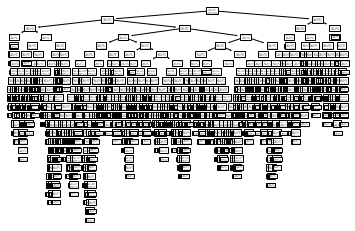

In [24]:
# decision tree 알고리즘을 훈련 데이터로 학습시키면 tree가 만들어짐.
plot_tree(tree_clf)
plt.show()

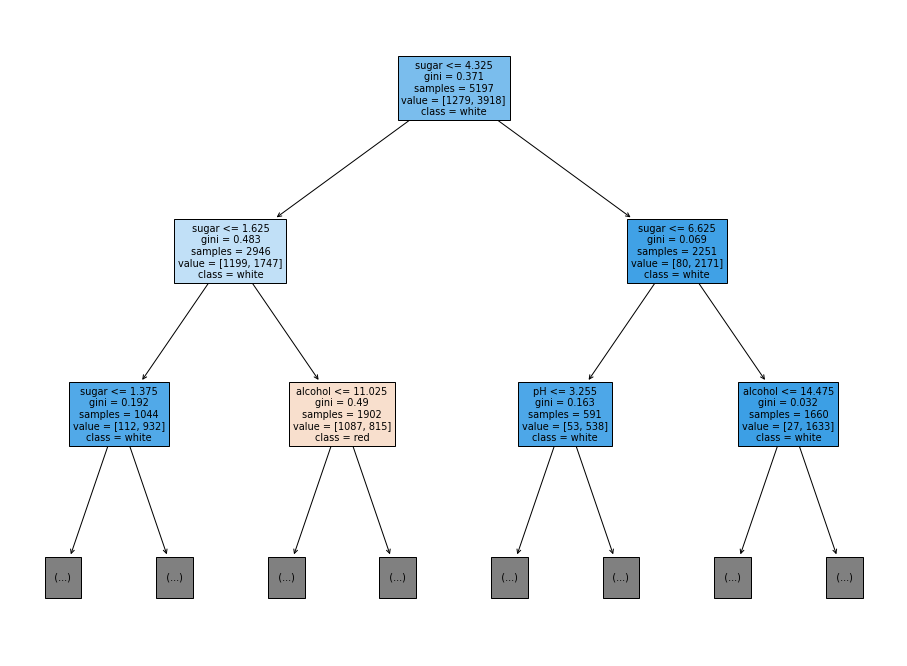

In [28]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2, 
          feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

In [29]:
# 테스트 셋 예측값
te_pred = tree_clf.predict(X_te)

In [30]:
confusion_matrix(y_te, te_pred)

array([[226,  94],
       [ 81, 899]])

In [31]:
print(classification_report(y_te, te_pred, target_names=target_names))
# train acc: 1.0, test acc: 0.87 -> overfitting.

              precision    recall  f1-score   support

         red       0.74      0.71      0.72       320
       white       0.91      0.92      0.91       980

    accuracy                           0.87      1300
   macro avg       0.82      0.81      0.82      1300
weighted avg       0.86      0.87      0.86      1300



Decision Tree를 나누는 기준:

__Gini impurity(불순도)__

$
Gini = 1 - \sum_i p_i^2
$

*   $p_i$: $i$번째 클래스가 될 확률
*   이진(binary class) 분류
    *   gini = 1 - ((양성 클래스 확률)^2 + (음성 클래스 확률)^2)
    *   양성과 음성의 비율이 1:1인 경우, gini = 1 - (0.5^2 + 0.5^2) = 0.5. 불순도 최대.
    *   양성 또는 음성으로 완벽하게 분류된 경우, gini = 1 - 1 = 0. 불순도 최소.
*   Decision tree는 부모 노드와 자식 노드의 gini 불순도 차이가 가능한 커지도록 가지를 성장시킴.


__Entropy(엔트로피)__

$
Entropy = -\sum_i p_i \log_k (p_i)
$

*   $k$: 클래스의 개수(이진 분류인 경우, k=2).
*   $p_i$: $i$번째 클래스가 될 확률.
*   이진 분류
    *   양성과 음성의 비율이 1:1인 경우, Entropy = 1. 엔트로피 최대.
    *   양성 또는 음성으로 완변히 분류된 경우, Entropy = 0. 엔트로피 최소.
*   Decision tree 객체를 생성할 때 criterion='entropy'라고 설정하면, 부모 노드와 자식 노드에서의 엔트로피 차이가 가능하면 커지도록 가지를 생성함.
